##**Membuat Model NLP dengan TensorFlow** 
Oleh: Firsti Eliora

In [47]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [48]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
-O /tmp/bbc-text.csv

--2022-11-25 08:54:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 74.125.70.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.04s   

2022-11-25 08:54:56 (136 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [49]:
dataset = pd.read_csv('/tmp/bbc-text.csv')
display(dataset.head())

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [50]:
kategori = pd.get_dummies(dataset.category)
datasetbaru = pd.concat([dataset, kategori], axis=1)
datasetbaru = datasetbaru.drop(columns='category')
datasetbaru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [51]:
text = datasetbaru['text'].values
label = datasetbaru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [52]:
#Membagi Data Training dan Testing
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [53]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
word_index = tokenizer.word_index
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [54]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nAkurasi telah lebih dari 98%!")
      self.model.stop_training = True
callbacks = myCallback()

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
plot_model = model.fit(padded_latih, label_latih, epochs=20, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/20
56/56 - 9s - loss: 1.6021 - accuracy: 0.2551 - val_loss: 1.5698 - val_accuracy: 0.2404 - 9s/epoch - 163ms/step
Epoch 2/20
56/56 - 7s - loss: 1.3441 - accuracy: 0.4152 - val_loss: 1.0937 - val_accuracy: 0.4427 - 7s/epoch - 122ms/step
Epoch 3/20
56/56 - 7s - loss: 0.5915 - accuracy: 0.7876 - val_loss: 0.5102 - val_accuracy: 0.8225 - 7s/epoch - 123ms/step
Epoch 4/20
56/56 - 7s - loss: 0.1836 - accuracy: 0.9427 - val_loss: 0.4749 - val_accuracy: 0.8292 - 7s/epoch - 123ms/step
Epoch 5/20

Akurasi telah lebih dari 98%!
56/56 - 7s - loss: 0.0376 - accuracy: 0.9893 - val_loss: 0.5326 - val_accuracy: 0.8427 - 7s/epoch - 123ms/step


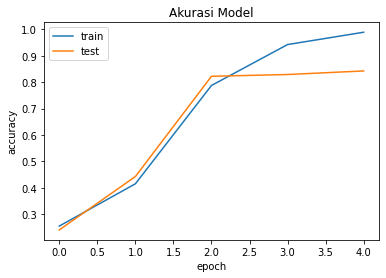

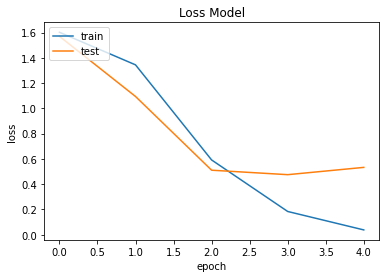

In [57]:
#Accuracy  
plt.plot(plot_model.history['accuracy'])
plt.plot(plot_model.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Loss
plt.plot(plot_model.history['loss'])
plt.plot(plot_model.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()